# Training the model using LSTM

In [9]:
import pandas as pd

In [10]:
data=pd.read_csv("stock_data.csv")

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,185.149994,186.699997,183.600006,184.449997,183.876907,25968357
1,2020-01-02,185.000000,194.699997,184.600006,193.750000,193.148010,57289863
2,2020-01-03,192.899994,195.649994,189.250000,191.100006,190.506256,47572728
3,2020-01-06,191.000000,191.000000,185.050003,185.649994,185.073181,28621212
4,2020-01-07,187.000000,189.399994,182.300003,184.699997,184.126129,34995035
...,...,...,...,...,...,...,...
927,2023-09-25,623.849976,625.200012,617.900024,618.700012,618.700012,6390681
928,2023-09-26,618.700012,625.700012,617.950012,619.799988,619.799988,6271108
929,2023-09-27,619.950012,621.900024,616.750000,620.150024,620.150024,5960490
930,2023-09-28,622.900024,623.799988,612.250000,614.099976,614.099976,6768196


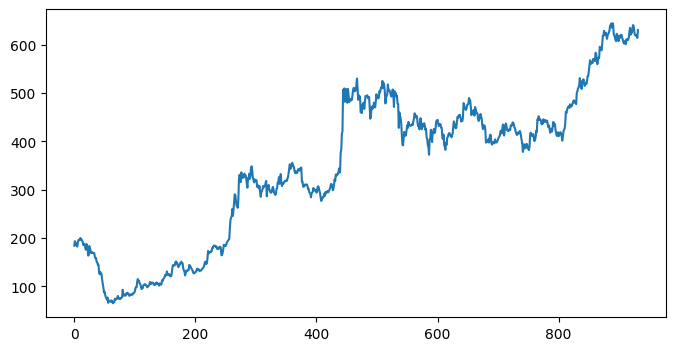

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(data['Close'])

In [13]:
data=data.reset_index()
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-01,185.149994,186.699997,183.600006,184.449997,183.876907,25968357
1,1,2020-01-02,185.000000,194.699997,184.600006,193.750000,193.148010,57289863
2,2,2020-01-03,192.899994,195.649994,189.250000,191.100006,190.506256,47572728
3,3,2020-01-06,191.000000,191.000000,185.050003,185.649994,185.073181,28621212
4,4,2020-01-07,187.000000,189.399994,182.300003,184.699997,184.126129,34995035


In [14]:
ma100= data['Close'].rolling(100).mean() #moving average of 100 size
ma200= data['Close'].rolling(200).mean() #moving average of 200 size
# ma100,ma200

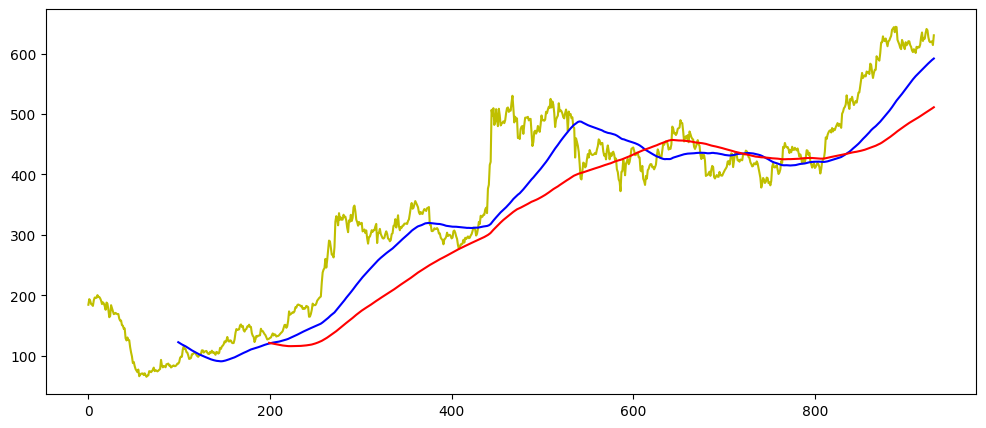

In [15]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'],'y')
plt.plot(ma100,'b')
plt.plot(ma200,'r')

In [16]:
total_size=len(data)
total_size

932

In [17]:
train_size=int(total_size*0.8)
test_size=total_size-train_size

In [18]:
import numpy as np

In [19]:
#splitting into train test
data_training=pd.DataFrame(data['Close'][0:train_size])
data_training.to_csv("data_training" , index=False)
data_testing=pd.DataFrame(data['Close'][train_size:total_size])
data_testing.to_csv("data_testing" , index=False)

In [20]:
data_training.shape,data_testing.shape

((745, 1), (187, 1))

In [13]:
#data scaling
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))

In [14]:
train_data=scale.fit_transform(data_training)

In [15]:
train_data

array([[0.0499456 ],
       [0.04656877],
       [0.05053069],
       ...,
       [0.16911067],
       [0.19083228],
       [0.17966614]])

In [16]:
train_data.shape

(3964, 1)

In [17]:
#defining features (100)
x_train=[]
y_train=[]

In [18]:
for i in range(100,train_data.shape[0]):
    x_train.append(train_data[i-100:i])
    y_train.append(train_data[i,0])
    
x_train=np.array(x_train)
y_train=np.array(y_train)

In [19]:
x_train.shape , y_train.shape

((3864, 100, 1), (3864,))

In [20]:
# x_train=x_train.reshape(x_train.shape[0],x_train.shape[1])

In [21]:
# x_train.shape

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model=Sequential()
#layer_1
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#layer_2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

#layer_3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

#layer_4
model.add(LSTM(units=100,activation='relu'))
model.add(Dropout(0.5))

# #layer_5
# model.add(LSTM(units=120,activation='relu'))
# model.add(Dropout(0.6))
          
#last layer
model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
121/121 [==============================] - 30s 210ms/step - loss: 0.0281
Epoch 2/25
121/121 [==============================] - 26s 213ms/step - loss: 0.0076
Epoch 3/25
121/121 [==============================] - 27s 223ms/step - loss: 0.0067
Epoch 4/25
121/121 [==============================] - 27s 223ms/step - loss: 0.0064
Epoch 5/25
121/121 [==============================] - 27s 226ms/step - loss: 0.0051
Epoch 6/25
121/121 [==============================] - 27s 222ms/step - loss: 0.0052
Epoch 7/25
121/121 [==============================] - 27s 223ms/step - loss: 0.0047
Epoch 8/25
121/121 [==============================] - 26s 216ms/step - loss: 0.0042
Epoch 9/25
121/121 [==============================] - 26s 216ms/step - loss: 0.0042
Epoch 10/25
121/121 [==============================] - 26s 215ms/step - loss: 0.0041
Epoch 11/25
121/121 [==============================] - 26s 216ms/step - loss: 0.0039
Epoch 12/25
121/121 [==============================] - 27s 220ms/step - lo

In [26]:
model.save("lstm_saved_model.keras")

In [27]:
import joblib
filename = 'lstm_saved_model.sav'
joblib.dump(model, filename)

['lstm_saved_model.sav']